<a href="https://colab.research.google.com/github/mehraj-alom/pytorch/blob/main/cvandcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Theory


* [`torchvision`] base domain library for PyTorch computer vision

* `torchvision.datasets` - get datasets and data loading functions

* `torchvision.models` - get pretrained computer vision models leverage for your own problems
* `torchvision.transforms`- functions for manipulating your visi
to be suitable for use with an ML model
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over a datase


# Importent Libs

In [73]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# Importing the dataset

In [74]:
# Setup Training data
train_data = datasets.FashionMNIST(
    root="data",
    train = True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train = False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

In [75]:
print(len(train_data),len(test_data))

60000 10000


In [76]:
image, label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [77]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

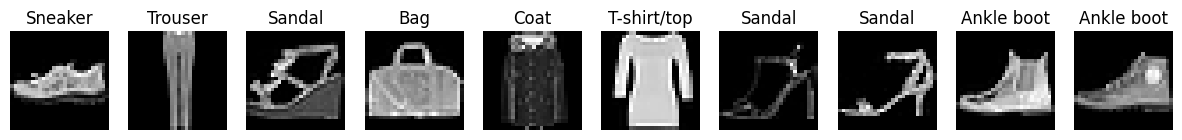

In [78]:
torch.manual_seed(42)
a = torch.randint(1, 6000, (10,))
plt.figure(figsize=(15,4))
for i in range(len(a)):
  image,label = train_data[a[i]]
  plt.subplot(1, len(a), i + 1)
  plt.imshow(image.squeeze(),cmap="grey")
  plt.title(class_names[label])
  plt.axis("off")
plt.show()

# Turning data into mini batches

In [79]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_DataLoader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_DataLoader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)
print(train_DataLoader,test_DataLoader,"\n")
print(len(train_DataLoader),len(test_DataLoader))

train_feature_Batch, train_feature_Labels = next(iter(train_DataLoader))
print(train_feature_Batch.shape, train_feature_Labels.shape)

<torch.utils.data.dataloader.DataLoader object at 0x7cff4222b7d0> <torch.utils.data.dataloader.DataLoader object at 0x7cfefcbff0e0> 

1875 313
torch.Size([32, 1, 28, 28]) torch.Size([32])


# Buildinng the model

In [80]:
NUM_ClASSES = len(class_names)
from torch import nn
class Model_e1(nn.Module):
  def __init__(self,input,hidden,output):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input,out_features=hidden),
        nn.Linear(in_features=hidden,out_features=output)
    )
  def forward(self, X):
    return self.layer_stack(X)

model = Model_e1(input=28*28,hidden=64,output=NUM_ClASSES)
model

Model_e1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [81]:
import requests
from pathlib import Path

# helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
# Import accuracy metric
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

helper_functions.py already exists, skipping download


In [82]:
from tqdm.auto import tqdm

In [83]:
torch.manual_seed(42)
epochs = 10
for epoch in tqdm(range(epochs)):
  train_loss = 0
  train_acc = 0
  for batch, (X,y) in enumerate(train_DataLoader):
    model.train()
    y_Pred = model(X)
    loss = loss_fn(y_Pred,y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_Pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if batch % 300 == 0 :
      print(f"Batch : {(batch * len(X))/len(train_DataLoader.dataset)}")
  train_loss /= len(train_DataLoader)
  train_acc /= len(train_DataLoader)

  test_loss = 0
  test_preds = []
  test_labels = []
  model.eval()
  with torch.inference_mode():
    for X,y in test_DataLoader:
      y_pred = model(X)
      test_loss += loss_fn(y_pred,y)
      test_preds.append(y_pred.argmax(dim=1))
      test_labels.append(y)

    test_loss /= len(test_DataLoader)
    test_preds = torch.cat(test_preds)
    test_labels = torch.cat(test_labels)
    test_acc = accuracy_fn(y_true=test_labels, y_pred=test_preds)

  print(f"\nEpoch: {epoch+1} | Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

  0%|          | 0/10 [00:00<?, ?it/s]

Batch : 0.0
Batch : 0.16
Batch : 0.32
Batch : 0.48
Batch : 0.64
Batch : 0.8
Batch : 0.96

Epoch: 1 | Train loss: 0.57979 | Train acc: 79.52% | Test loss: 0.50219 | Test acc: 82.41%
Batch : 0.0
Batch : 0.16
Batch : 0.32
Batch : 0.48
Batch : 0.64
Batch : 0.8
Batch : 0.96

Epoch: 2 | Train loss: 0.47447 | Train acc: 83.37% | Test loss: 0.48410 | Test acc: 82.84%
Batch : 0.0
Batch : 0.16
Batch : 0.32
Batch : 0.48
Batch : 0.64
Batch : 0.8
Batch : 0.96

Epoch: 3 | Train loss: 0.45400 | Train acc: 84.10% | Test loss: 0.47749 | Test acc: 83.52%
Batch : 0.0
Batch : 0.16
Batch : 0.32
Batch : 0.48
Batch : 0.64
Batch : 0.8
Batch : 0.96

Epoch: 4 | Train loss: 0.44181 | Train acc: 84.50% | Test loss: 0.46291 | Test acc: 83.71%
Batch : 0.0
Batch : 0.16
Batch : 0.32
Batch : 0.48
Batch : 0.64
Batch : 0.8
Batch : 0.96

Epoch: 5 | Train loss: 0.43539 | Train acc: 84.68% | Test loss: 0.46926 | Test acc: 83.18%
Batch : 0.0
Batch : 0.16
Batch : 0.32
Batch : 0.48
Batch : 0.64
Batch : 0.8
Batch : 0.96

Epoch

In [84]:
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval().to(device) # model to the target device
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))


        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}


model_results = eval_model(model=model, data_loader=test_DataLoader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_results

{'model_name': 'Model_e1',
 'model_loss': 0.46272721886634827,
 'model_acc': 83.59624600638978}

# **Lets add some non_linerity and improve the performance**

In [85]:
class Model_one(nn.Module):
  def __init__(self,input: int, hidden: int, output :int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input,out_features=hidden),
        nn.ReLU(),
        nn.Linear(in_features=hidden,out_features=hidden),
        nn.ReLU(),
        nn.Linear(in_features=hidden,out_features=hidden),
        nn.ReLU(),
        nn.Linear(in_features=hidden,out_features=output),
        nn.ReLU()
    )
  def forward(self,X):
    return self.layer_stack(X)

model_1 = Model_one(input = 28*28,hidden=128,output=NUM_ClASSES).to(device)
print(model_1)
next(model_1.parameters()).device

Model_one(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): ReLU()
    (5): Linear(in_features=128, out_features=128, bias=True)
    (6): ReLU()
    (7): Linear(in_features=128, out_features=10, bias=True)
    (8): ReLU()
  )
)


device(type='cuda', index=0)

In [86]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params=model_1.parameters(),
    lr=0.1
)

In [87]:
def train_data(model : torch.nn.Module,
               data_loader : torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer : torch.optim.Optimizer,
               accuracy_fn,
               device : torch.device=device
               ) :
  train_loss , train_acc = 0 , 0
  model_1.to(device)
  for batch, (X,y) in enumerate(data_loader):
    model_1.train()
    X , y = X.to(device), y.to(device)
    y_pred = model_1(X)
    loss = loss_fn(y_pred,y)
    train_loss += loss
    train_acc += accuracy_fn(
        y_true = y,
        y_pred = y_pred.argmax(dim=1) # logits --> Actual_prediction
    )
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")



def test_step(model : torch.nn.Module,
              data_loader : torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              optimizer : torch.optim.Optimizer,
              accuracy_fn,
              device : torch.device = device
    ):
  test_loss , test_acc = 0, 0
  model.to(device)
  model_1.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X , y = X.to(device) , y.to(device)
      test_pred = model_1(X)
      test_loss += loss_fn(test_pred,y)
      test_acc += accuracy_fn(
          y_true = y ,
          y_pred = test_pred.argmax(dim=1)
      )
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [88]:
torch.manual_seed(42)
# Measure time
from timeit import default_timer as timer
from helper_functions import print_train_time

train_time_start_on_gpu = timer()

epochs = 10

for epoch in tqdm(range(epochs)):
  train_data(model=model_1,
             data_loader=train_DataLoader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn
             )
  test_step(model=model_1,
            data_loader=test_DataLoader,
            loss_fn = loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn)
train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Train loss: 1.03018 | Train accuracy: 65.41%
Test loss: 0.71226 | Test accuracy: 72.83%

Train loss: 0.65692 | Train accuracy: 74.65%
Test loss: 0.65877 | Test accuracy: 74.78%

Train loss: 0.60118 | Train accuracy: 76.57%
Test loss: 0.62901 | Test accuracy: 75.84%

Train loss: 0.57205 | Train accuracy: 77.53%
Test loss: 0.59162 | Test accuracy: 77.27%

Train loss: 0.32956 | Train accuracy: 87.83%
Test loss: 0.37777 | Test accuracy: 86.38%

Train loss: 0.30917 | Train accuracy: 88.58%
Test loss: 0.36316 | Test accuracy: 86.87%

Train loss: 0.29428 | Train accuracy: 88.92%
Test loss: 0.35253 | Test accuracy: 87.31%

Train loss: 0.28289 | Train accuracy: 89.29%
Test loss: 0.34728 | Test accuracy: 87.45%

Train loss: 0.27357 | Train accuracy: 89.83%
Test loss: 0.34561 | Test accuracy: 87.92%

Train loss: 0.26258 | Train accuracy: 90.06%
Test loss: 0.32522 | Test accuracy: 88.11%


Train time on cuda: 106.092 seconds


In [89]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            y_pred = model_1(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))


        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code
model_1_results = eval_model(model=model_1, data_loader=test_DataLoader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
print(model_results,"\n")
print(model_1_results)

{'model_name': 'Model_e1', 'model_loss': 0.46272721886634827, 'model_acc': 83.59624600638978} 

{'model_name': 'Model_one', 'model_loss': 0.32521992921829224, 'model_acc': 88.10902555910543}


**HOOOOoooooHHH**
performance improved


# **Model 2**: Building a Convolutional Neural Network (CNN)